In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

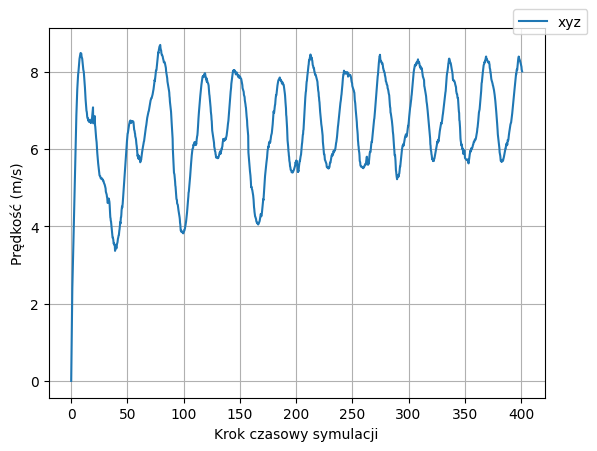

In [4]:
frame = pd.read_csv('discrete_action/emission.csv')

grouped = frame.groupby(by=['time']).mean().reset_index()
plt.plot(grouped['time'], grouped['speed'], label="xyz")
plt.legend(bbox_to_anchor=(1.1, 1.07))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
plt.show()

In [6]:
target_velocity = pd.read_csv('test_rewards/target_velocity.csv')
avg_velocity = pd.read_csv('test_rewards/avg_velocity.csv')
min_delay = pd.read_csv('test_rewards/min_delay.csv')
avg_delay = pd.read_csv('test_rewards/avg_delay.csv')
parameterized = pd.read_csv('test_rewards/parameterized.csv')

rewards = [target_velocity, avg_velocity, min_delay, avg_delay, parameterized]


6.546950014291667
3.552202838191401
3.3569625599016786
6.310430076153765
0.4002152524534538


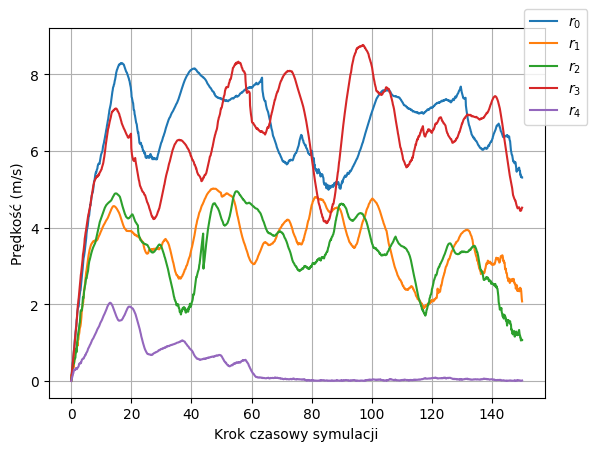

In [4]:
for i, frame in enumerate(rewards):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label = f"$r_{i}$"
    # print(grouped['fuel'].sum())
    print(grouped['speed'].mean())
    plt.plot(grouped['time'], grouped['speed'], label=label)
plt.legend(bbox_to_anchor=(1.1, 1.07))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
# plt.show()
plt.savefig('screenshots/rewards_eight.png', dpi=300)

6.546950014291667
3.552202838191401
3.3569625599016786
6.310430076153765
0.4002152524534538


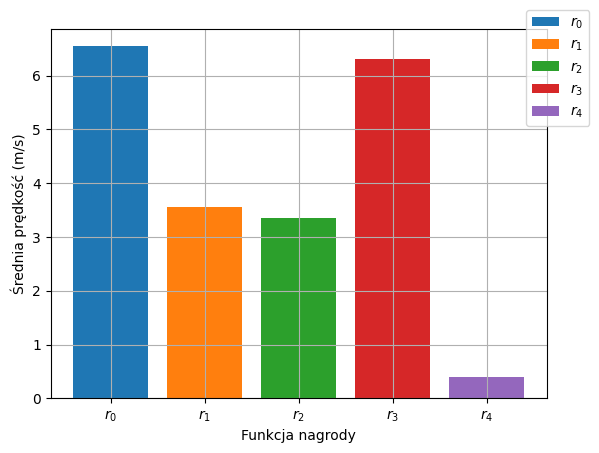

In [11]:
for i, frame in enumerate(rewards):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label = f"$r_{i}$"
    print(grouped['speed'].mean())
    plt.bar(label, grouped['speed'].mean(), label=label)
plt.legend(bbox_to_anchor=(1.1, 1.07))
plt.grid()
plt.xlabel("Funkcja nagrody")
plt.ylabel("Średnia prędkość (m/s)")
# plt.show()
plt.savefig('screenshots/rewards_eight_bar.png', dpi=300)

In [12]:
6.54/6.31

1.0364500792393028

In [13]:
6.31/6.54

0.9648318042813455

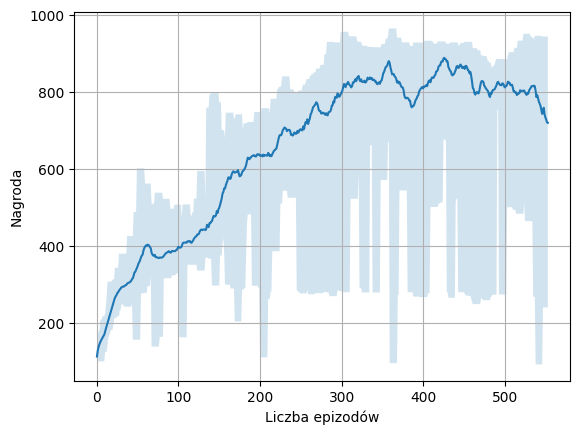

In [21]:
progress = pd.read_csv('14_0/progress.csv')

ax = sns.lineplot(progress['episode_reward_mean'])
ax.fill_between(progress.index, progress['episode_reward_min'], progress['episode_reward_max'], alpha=0.2)
ax.set(xlabel='Liczba epizodów', ylabel='Nagroda')
plt.grid()
# ax.set(xlabel='Liczba epizodów', ylabel='Nagroda')
plt.savefig('14AVs_eight.png', dpi=300)
# plt.show()

In [46]:

rl_0 = pd.read_csv('data/human.csv')
rl_1 = pd.read_csv('data/13_1.csv')
rl_1_discrete = pd.read_csv('discrete_action/emission_v2.csv')
rl_14 = pd.read_csv('test_rewards/target_velocity.csv')

data = [rl_0, rl_1, rl_1_discrete, rl_14]

labels = {
    0: "0 CAV",
    1: "1 CAV",
    2: "14 CAVs - discrete",
    3: "14 CAVs"
}


6.664423412549833


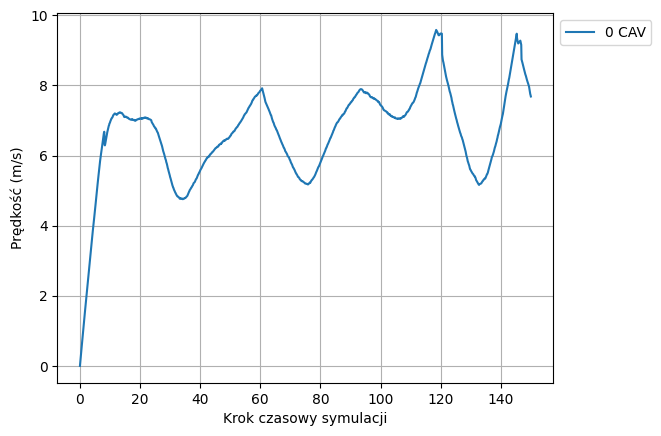

In [39]:
for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label =f"{i} CAV" if i != 2 else "14 CAV"
    print(grouped['speed'].mean())
    plt.plot(grouped['time'], grouped['speed'], label=label)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
plt.show()
# plt.savefig('ring_velocity_benchmark.png', dpi=300)

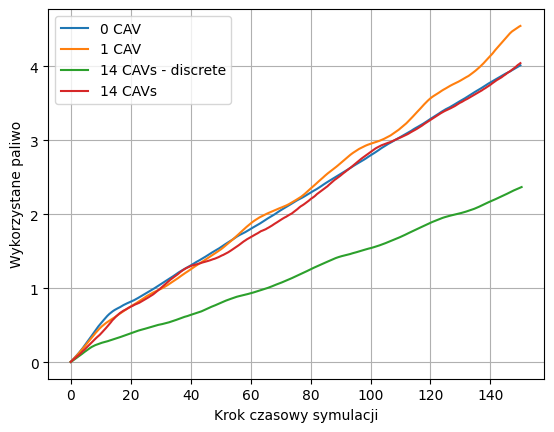

In [39]:
for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).sum().reset_index()
    grouped['fuel'] = grouped.fuel.cumsum()
    plt.plot(grouped['time'], grouped['fuel'], label=labels[i])
plt.legend(loc='best')
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Wykorzystane paliwo")
# plt.show()
plt.savefig('eight_fuel_consumption.png', dpi=300)

In [23]:
def cum_no_stopped_vehicles(csv):
    df = pd.DataFrame()
    pd.options.mode.chained_assignment = None
    for veh_id in csv["id"].unique():
        tmp = csv[csv['id'] == veh_id]
        a = tmp['speed'].to_numpy()
        a = [a[i] < 1.0 and a[i-1] > 1.0 for i in range(1, len(a))]
        a.append(False)
        tmp['speed'] = a
        df = pd.concat([df, tmp])
    tmp = csv.assign(stopped=df['speed'].to_numpy())
    tmp['stopped'] = tmp['stopped'].astype('int')
    tmp = tmp.groupby(by=['time']).sum().reset_index()
    tmp['stopped'] = tmp['stopped'].cumsum()
    return tmp

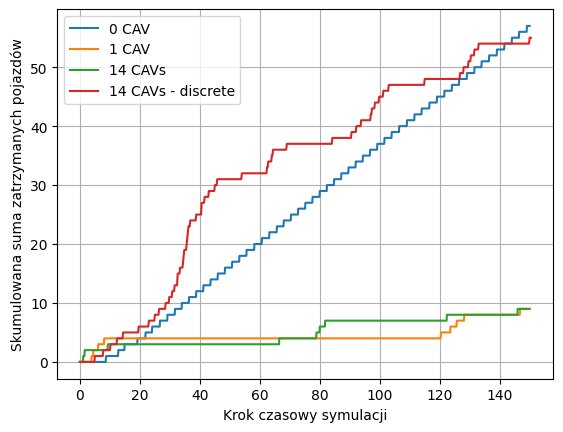

In [37]:
plt.plot(cum_no_stopped_vehicles(rl_0)['time'], cum_no_stopped_vehicles(rl_0)['stopped'], label="0 CAV")
plt.plot(cum_no_stopped_vehicles(rl_1)['time'], cum_no_stopped_vehicles(rl_1)['stopped'], label="1 CAV")
plt.plot(cum_no_stopped_vehicles(rl_14)['time'], cum_no_stopped_vehicles(rl_14)['stopped'], label="14 CAVs")
plt.plot(cum_no_stopped_vehicles(rl_1_discrete)['time'], cum_no_stopped_vehicles(rl_1_discrete)['stopped'], label="14 CAVs - discrete")
plt.legend(loc='best')
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Skumulowana suma zatrzymanych pojazdów")
# plt.show()
plt.savefig('ring_cum_no_stopped_vehicles.png', dpi=300)

6.341692548796858
6.664423412549833
6.051140734863535
6.546950014291667


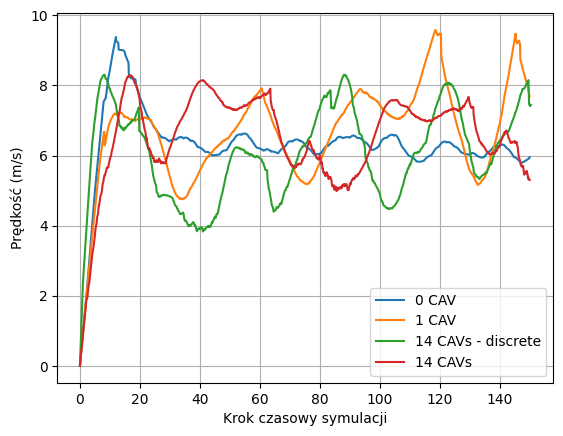

In [47]:

for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    print(grouped['speed'].mean())
    plt.plot(grouped['time'], grouped['speed'], label=labels[i])
# plt.legend(bbox_to_anchor=(1, 1))
plt.legend()
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
# plt.show()
plt.savefig('eight_velocity_benchmark.png', dpi=300)

6.341692548796858
6.664423412549833
6.051140734863535
6.546950014291667


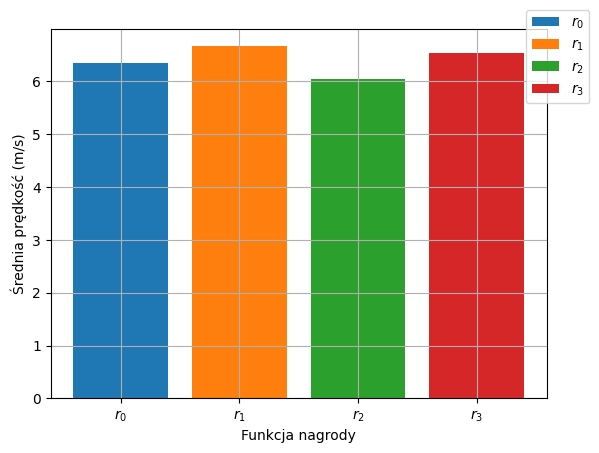

In [41]:
for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label = f"$r_{i}$"
    print(grouped['speed'].mean())
    plt.bar(label, grouped['speed'].mean(), label=label)
plt.legend(bbox_to_anchor=(1.1, 1.07))
plt.grid()
plt.xlabel("Funkcja nagrody")
plt.ylabel("Średnia prędkość (m/s)")
plt.show()
# plt.savefig('screenshots/rewards_eight_bar.png', dpi=300)

In [ ]:
6.34 6.66 6.54

In [9]:
6.66/6.34

1.050473186119874

In [10]:
6.54/6.43

1.0171073094867809

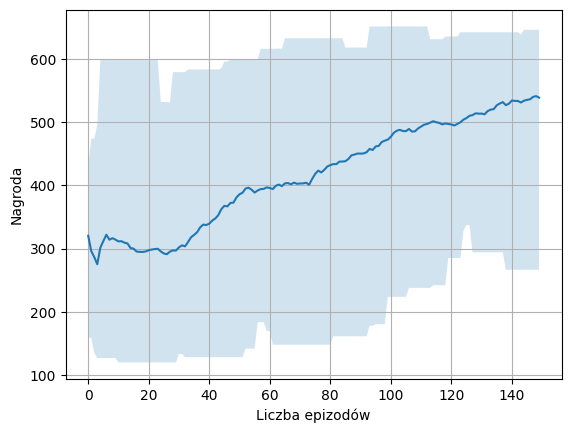

In [13]:
progress = pd.read_csv('13_1/progress.csv')

ax = sns.lineplot(progress['episode_reward_mean'])
ax.fill_between(progress.index, progress['episode_reward_min'], progress['episode_reward_max'], alpha=0.2)
ax.set(xlabel='Liczba epizodów', ylabel='Nagroda')
plt.grid()
ax.set(xlabel='Liczba epizodów', ylabel='Nagroda')
plt.savefig('13_1_eight.png', dpi=300)
# plt.show()